# Kelompok 18
23525063 - Fadhlan Nazhif Azizy

23525036 - Ivan Hardja

23525037 - Katherine Febrianty Sumartono

# Dataset: Global Youtube Statistics 2023
Link: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

## Business Understanding


1. Latar Belakang

Platform YouTube memiliki ekosistem monetisasi yang bergantung pada jumlah penonton, subscriber, jenis konten, dan lokasi. Mengetahui estimasi pendapatan channel dapat membantu creator, agensi, maupun analis marketing dalam menyusun strategi konten dan investasi.

2. Tujuan Bisnis

- Membangun model Machine Learning untuk memprediksi pendapatan tahunan channel YouTube berdasarkan fitur channel.

- Mengidentifikasi faktor-faktor utama yang mempengaruhi pendapatan.

- Mendukung pengambilan keputusan berbasis data terkait performa channel.

3. Pertanyaan Bisnis

- Apakah karakteristik channel dapat memprediksi pendapatan secara akurat?

- Fitur apa yang paling berpengaruh terhadap pendapatan?

- Bagaimana pendapatan bervariasi antar negara dan jenis channel?

4. Indikator Kesuksesan

- Model mampu memberi prediksi pendapatan dengan error yang rendah.

- Insight yang dihasilkan relevan dan dapat digunakan secara praktis.

## Data Preprocessing

In [ ]:
# import library dan module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor # Added this import
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# Import dataset
path = "https://drive.google.com/uc?export=download&id=1WxD4Mld0Rbgj_FSpzQ0An8dzKAIp7sEs"
df = pd.read_csv(path, encoding='latin1')

# lihat semua kolom
df.info()

# lihat semua unique value
column_object = df.select_dtypes(include=['object']).columns

for col in column_object:
  unique_value = df[col].unique()

  print(f"Column: {col} (Total: {len(unique_value)})")

  if len(unique_value) < 100:
    print(unique_value.tolist())
  else:
    print(">> Too many unique value")
  print("_"*30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
# Fix column name
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# Remove next line
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

In [ ]:
# Remove duplicated youtuber
before_dup = df.shape[0]
df = df.drop_duplicates(subset=['youtuber'], keep='first')
after_dup = df.shape[0]

print("\n=== Duplikasi ===")
print(f"Jumlah baris sebelum drop_duplicates: {before_dup}")
print(f"Jumlah baris setelah drop_duplicates:  {after_dup}")


=== Duplikasi ===
Jumlah baris sebelum drop_duplicates: 995
Jumlah baris setelah drop_duplicates:  995


Insight: Tidak ada baris duplikat yang ditemukan berdasarkan nama youtuber, menunjukkan setiap channel adalah unik dalam dataset.

In [ ]:
# Remove negatif value in subscribers, video views and uploads
mask_valid = (df["subscribers"] >= 0) & (df["video_views"] >= 0) & (df["uploads"] >= 0)
invalid_rows = df.shape[0] - df[mask_valid].shape[0]
print(f"\nJumlah baris dengan nilai negatif (akan dibuang): {invalid_rows}")

df = df[mask_valid].copy()


Jumlah baris dengan nilai negatif (akan dibuang): 0


Insight: Tidak ada nilai negatif yang ditemukan pada kolom 'subscribers', 'video_views', dan 'uploads', menunjukkan data sudah bersih dari anomali ini.

In [ ]:
# Check number of missing value
print("\n=== Missing values per kolom (sebelum penanganan) ===")
print(df.isna().sum())


=== Missing values per kolom (sebelum penanganan) ===
rank                                         0
youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
title                                        0
uploads                                      0
country                                    122
abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
creat

In [ ]:
# Fill nan value in column category, channel_type, country and abbreviation with Unknown

cat_fill_unknown = ["category", "channel_type", "Country", "Abbreviation"]
for col in cat_fill_unknown:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

print("\n=== Missing values per kolom (setelah isi Unknown untuk beberapa kategori) ===")
print(df.isna().sum())


=== Missing values per kolom (setelah isi Unknown untuk beberapa kategori) ===
rank                                         0
youtuber                                     0
subscribers                                  0
video_views                                  0
category                                     0
title                                        0
uploads                                      0
country                                    122
abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year               

Insight: Setelah mengisi nilai NaN dengan 'Unknown' pada kolom kategori dan tipe channel, masih terdapat nilai hilang pada kolom terkait negara, rank, dan informasi demografi, yang perlu penanganan lebih lanjut.

In [ ]:
# data created_year, created_month dan created_date yang kosong dihapus
df.dropna(subset=['created_year'], inplace=True)
df.dropna(subset=['created_month'], inplace=True)
df.dropna(subset=['created_date'], inplace=True)

print("\n=== Missing values per kolom (setelah dihapus untuk beberapa kategori) ===")
print(df.isna().sum())
df.info()


=== Missing values per kolom (setelah dihapus untuk beberapa kategori) ===
rank                                         0
youtuber                                     0
subscribers                                  0
video_views                                  0
category                                     0
title                                        0
uploads                                      0
country                                    120
abbreviation                               120
channel_type                                 0
video_views_rank                             0
country_rank                               114
channel_type_rank                           29
video_views_for_the_last_30_days            51
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               332
created_year                   

In [ ]:
# Feature engineering, make new feature channel_age_years

current_year = 2025  # misal asumsi tahun sekarang
df["channel_age_years"] = current_year - df["created_year"]

Insight: Tampilan 5 baris pertama DataFrame menunjukkan beberapa kolom awal seperti rank, youtuber, subscribers, dan video views sudah terload dengan baik, serta kolom baru 'channel_age_years' telah berhasil dibuat.

# Exploratory Data Analysis (EDA)

* Mengecek ukuran dataset, tipe data, dan ringkasan statistik.

* Memeriksa missing values, duplikasi, dan inkonsistensi.

* Plot distribusi pendapatan, subscribers, dan views.

* Korelasi antar variabel numerik.

* Analisis earnings berdasarkan negara & channel type.


In [ ]:
df.head()

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,...,created_year,created_month,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude,channel_age_years
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,19.0
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,19.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,13.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,19.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,19.0


In [ ]:
# Ukuran dataset
df.shape

(990, 29)

Insight: Dataset berisi 995 baris dan 29 kolom, memberikan gambaran ukuran data yang cukup komprehensif.

In [ ]:
# Menunjukkan tipe data dan jumlah baris not null di setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     990 non-null    int64  
 1   youtuber                                 990 non-null    object 
 2   subscribers                              990 non-null    int64  
 3   video_views                              990 non-null    float64
 4   category                                 990 non-null    object 
 5   title                                    990 non-null    object 
 6   uploads                                  990 non-null    int64  
 7   country                                  870 non-null    object 
 8   abbreviation                             870 non-null    object 
 9   channel_type                             990 non-null    object 
 10  video_views_rank                         990 non-null  

Insight: Beberapa kolom memiliki nilai yang hilang, terutama 'subscribers_for_last_30_days' dengan 337 nilai hilang, 'country' dan 'abbreviation' dengan 122 nilai hilang, serta kolom terkait informasi demografi dan geografi.

Insight: DataFrame memiliki kombinasi tipe data integer, float, dan object. Kolom seperti `country`, `abbreviation`, `video_views_rank`, `country_rank`, `channel_type_rank`, dan beberapa kolom demografi masih memiliki nilai non-null yang kurang dari total baris, mengindikasikan adanya *missing values*.

In [ ]:
# Deskripsi statistik dataset pada kolom numerik
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rank,990.0,4.977737e+02,2.877574e+02,1.000000e+00,2.492500e+02,4.975000e+02,7.467500e+02,9.950000e+02
subscribers,990.0,2.300758e+07,1.756454e+07,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video_views,990.0,1.105873e+10,1.413999e+10,0.000000e+00,4.302739e+09,7.761448e+09,1.355878e+10,2.280000e+11
uploads,990.0,9.233525e+03,3.423131e+04,0.000000e+00,2.002500e+02,7.370000e+02,2.723000e+03,3.013080e+05
video_views_rank,990.0,5.414634e+05,1.350513e+06,1.000000e+00,3.152500e+02,9.115000e+02,3.497250e+03,4.057944e+06
country_rank,876.0,3.679989e+02,1.190493e+03,1.000000e+00,1.100000e+01,5.000000e+01,1.230000e+02,7.741000e+03
channel_type_rank,961.0,7.388574e+02,1.933710e+03,1.000000e+00,2.700000e+01,6.500000e+01,1.390000e+02,7.741000e+03
video_views_for_the_last_30_days,939.0,1.756103e+08,4.163782e+08,1.000000e+00,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
lowest_monthly_earnings,990.0,3.707244e+04,7.199214e+04,0.000000e+00,2.800000e+03,1.345000e+04,3.812500e+04,8.509000e+05
highest_monthly_earnings,990.0,5.927867e+05,1.150755e+06,0.000000e+00,4.432500e+04,2.152000e+05,6.101750e+05,1.360000e+07


Insight: Ringkasan statistik menunjukkan variasi yang luas pada fitur-fitur numerik seperti `subscribers` (rata-rata 22.9 juta) dan `video_views` (rata-rata 11 miliar), dengan nilai maksimum yang sangat tinggi mengindikasikan adanya *outlier* atau channel yang sangat besar.

In [ ]:
# Menghitung semua baris yang terduplikasi
print(f"Jumlah baris terduplikasi : {sum(df.duplicated())}")

Jumlah baris terduplikasi : 0


Insight: Konfirmasi bahwa tidak ada baris yang terduplikasi secara keseluruhan dalam dataset.

In [ ]:
# Menghitung jumlah nilai null di setiap kolom
print("===== Kolom yang mengandung nilai null beserta jumlahnya =====")
# Hitung jumlah null setiap kolom
sum_null_col = df.isnull().sum()

pct_null_col = df.isnull().mean() * 100

null_col_only = sum_null_col[sum_null_col > 0]

null_summary = pd.DataFrame({
    'null_count': sum_null_col,
    'null_pct': pct_null_col
})

null_summary = null_summary[null_summary['null_count'] > 0]

null_summary

===== Kolom yang mengandung nilai null beserta jumlahnya =====


,null_count,null_pct
country,120,12.121212
abbreviation,120,12.121212
country_rank,114,11.515152
channel_type_rank,29,2.929293
video_views_for_the_last_30_days,51,5.151515
subscribers_for_last_30_days,332,33.535354
gross_tertiary_education_enrollment_(%),121,12.222222
population,121,12.222222
unemployment_rate,121,12.222222
urban_population,121,12.222222


Insight: Sebagian besar *missing values* ditemukan pada kolom terkait informasi negara (`country`, `abbreviation`), data demografi (`gross_tertiary_education_enrollment_(%)`, `population`, `unemployment_rate`, `urban_population`, `latitude`, `longitude`), serta `subscribers_for_last_30_days` yang memiliki persentase kehilangan data tertinggi (33.87%).

In [ ]:
print("\nTop 10 negara berdasarkan jumlah channel dalam dataset:")
print(df["country"].value_counts().head(10))


Top 10 negara berdasarkan jumlah channel dalam dataset:
country
United States     312
India             168
Brazil             61
United Kingdom     43
Mexico             33
Indonesia          28
Spain              22
Thailand           18
South Korea        17
Russia             16
Name: count, dtype: int64


Insight: Amerika Serikat dan India mendominasi jumlah channel terbanyak dalam dataset, yang mungkin mencerminkan pasar YouTube terbesar.

In [ ]:
print("\nRata-rata subscribers per kategori:")
print(df.groupby("category")["subscribers"].mean().sort_values(ascending=False).head(10))


Rata-rata subscribers per kategori:
category
Shows                    4.161538e+07
Trailers                 3.900000e+07
Film & Animation         2.858478e+07
Nonprofits & Activism    2.775000e+07
Sports                   2.710909e+07
Education                2.654222e+07
Music                    2.577650e+07
Movies                   2.565000e+07
Unknown                  2.399783e+07
Entertainment            2.141625e+07
Name: subscribers, dtype: float64


Insight: Kategori 'Shows', 'Trailers', dan 'Film & Animation' memiliki rata-rata *subscribers* tertinggi, menunjukkan bahwa jenis konten ini menarik banyak *subscriber*.

# Data Visualization

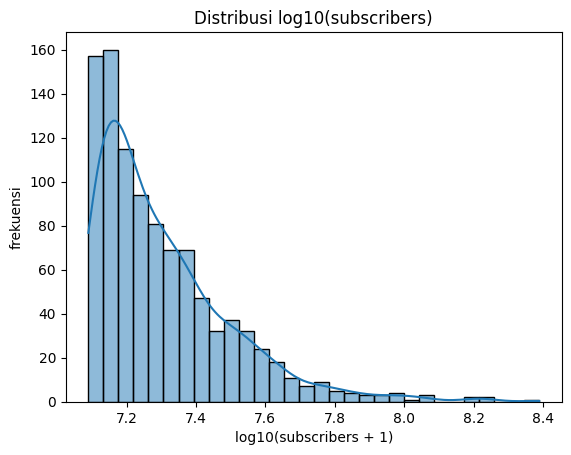

In [ ]:
plt.figure()
sns.histplot(np.log10(df["subscribers"]+1), bins=30, kde=True)
plt.title("Distribusi log10(subscribers)")
plt.xlabel("log10(subscribers + 1)")
plt.ylabel("frekuensi")
plt.show()

Insight: Distribusi *log-transformed subscribers* menunjukkan sebagian besar channel memiliki jumlah *subscribers* yang lebih rendah, dengan *tail* memanjang ke kanan menunjukkan keberadaan beberapa channel dengan *subscribers* yang sangat tinggi.

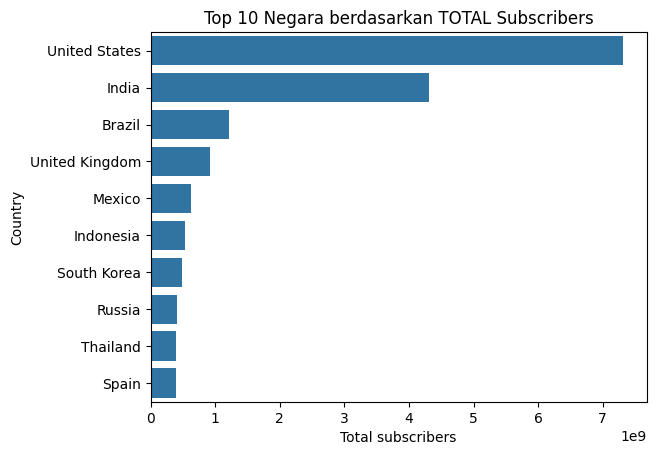

In [ ]:
country_subs = (
    df.groupby("country")["subscribers"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
sns.barplot(x=country_subs.values, y=country_subs.index)
plt.title("Top 10 Negara berdasarkan TOTAL Subscribers")
plt.xlabel("Total subscribers")
plt.ylabel("Country")
plt.show()

Insight: Amerika Serikat dan India secara signifikan memimpin dalam total *subscribers*, konsisten dengan jumlah channel terbanyak.

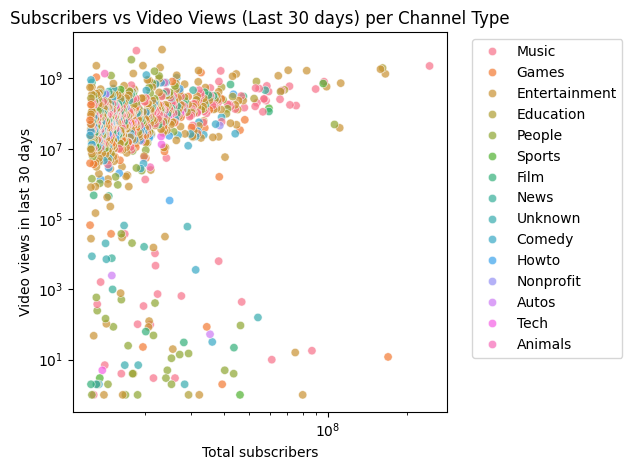

In [ ]:
df_scatter = df.dropna(subset=["subscribers", "video_views_for_the_last_30_days", "channel_type"])

plt.figure()
sns.scatterplot(
    data=df_scatter,
    x="subscribers",
    y="video_views_for_the_last_30_days",
    hue="channel_type",
    alpha=0.7
)
plt.title("Subscribers vs Video Views (Last 30 days) per Channel Type")
plt.xlabel("Total subscribers")
plt.ylabel("Video views in last 30 days")
plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight: Plot ini menunjukkan hubungan antara jumlah *subscribers* dan *video views* dalam 30 hari terakhir, yang bervariasi antar jenis *channel*. Sebagian besar *channel* menunjukkan hubungan positif, di mana *subscriber* dan *views* cenderung meningkat bersama.

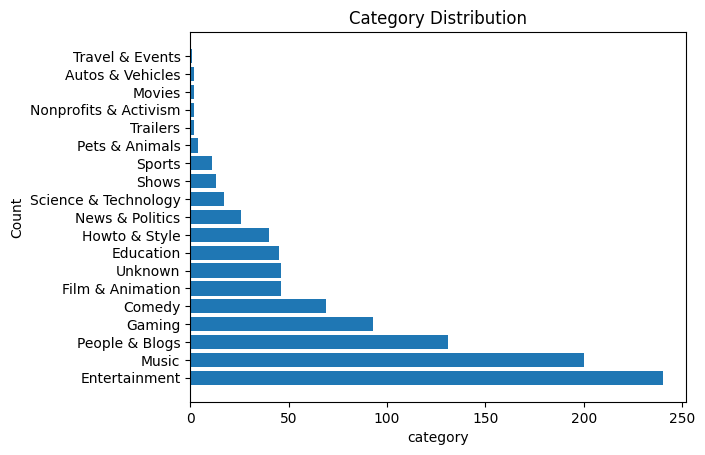

In [ ]:
eda_df = df.copy()
plt.title("Category Distribution")
plt.barh(eda_df["category"].value_counts().index, eda_df["category"].value_counts())
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

Insight: Kategori 'Entertainment', 'Music', dan 'People & Blogs' adalah kategori yang paling umum dalam dataset ini, menunjukkan popularitas jenis konten tersebut.

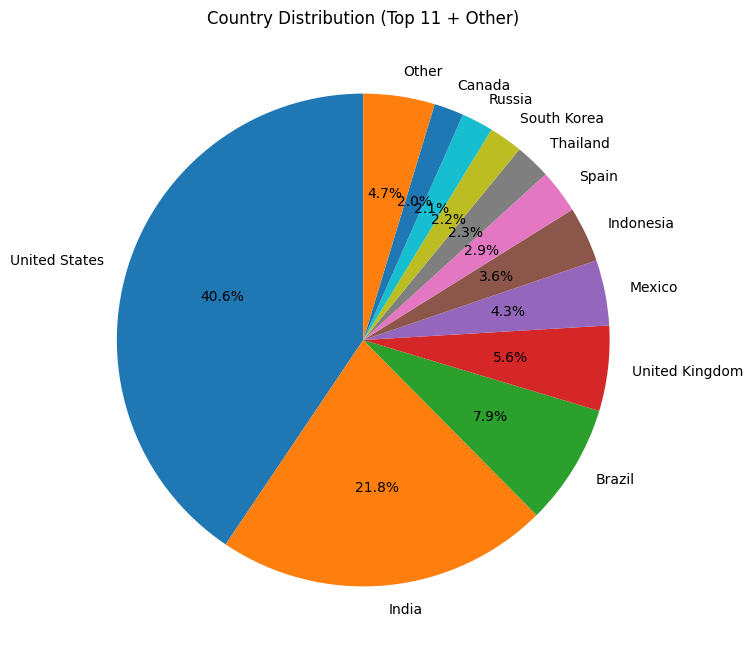

In [ ]:
eda_df = df.copy()

# Hitung frekuensi kategori
counts = eda_df["country"].value_counts()

# Ambil 11 kategori teratas
top11 = counts[:11]

# Gabungkan sisanya menjadi "Other"
other_sum = counts[25:].sum()

# Gabungkan ke satu Series baru
final_counts = top11.copy()
if other_sum > 0:
    final_counts["Other"] = other_sum

# Plot
plt.figure(figsize=(8, 8))
plt.title("Country Distribution (Top 11 + Other)")
plt.pie(
    final_counts.values,
    labels=final_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.show()

Insight: Diagram lingkaran menunjukkan dominasi channel dari Amerika Serikat (40.6%) dan India (21.8%) dalam dataset, yang selaras dengan temuan sebelumnya tentang jumlah channel dan total *subscribers*.

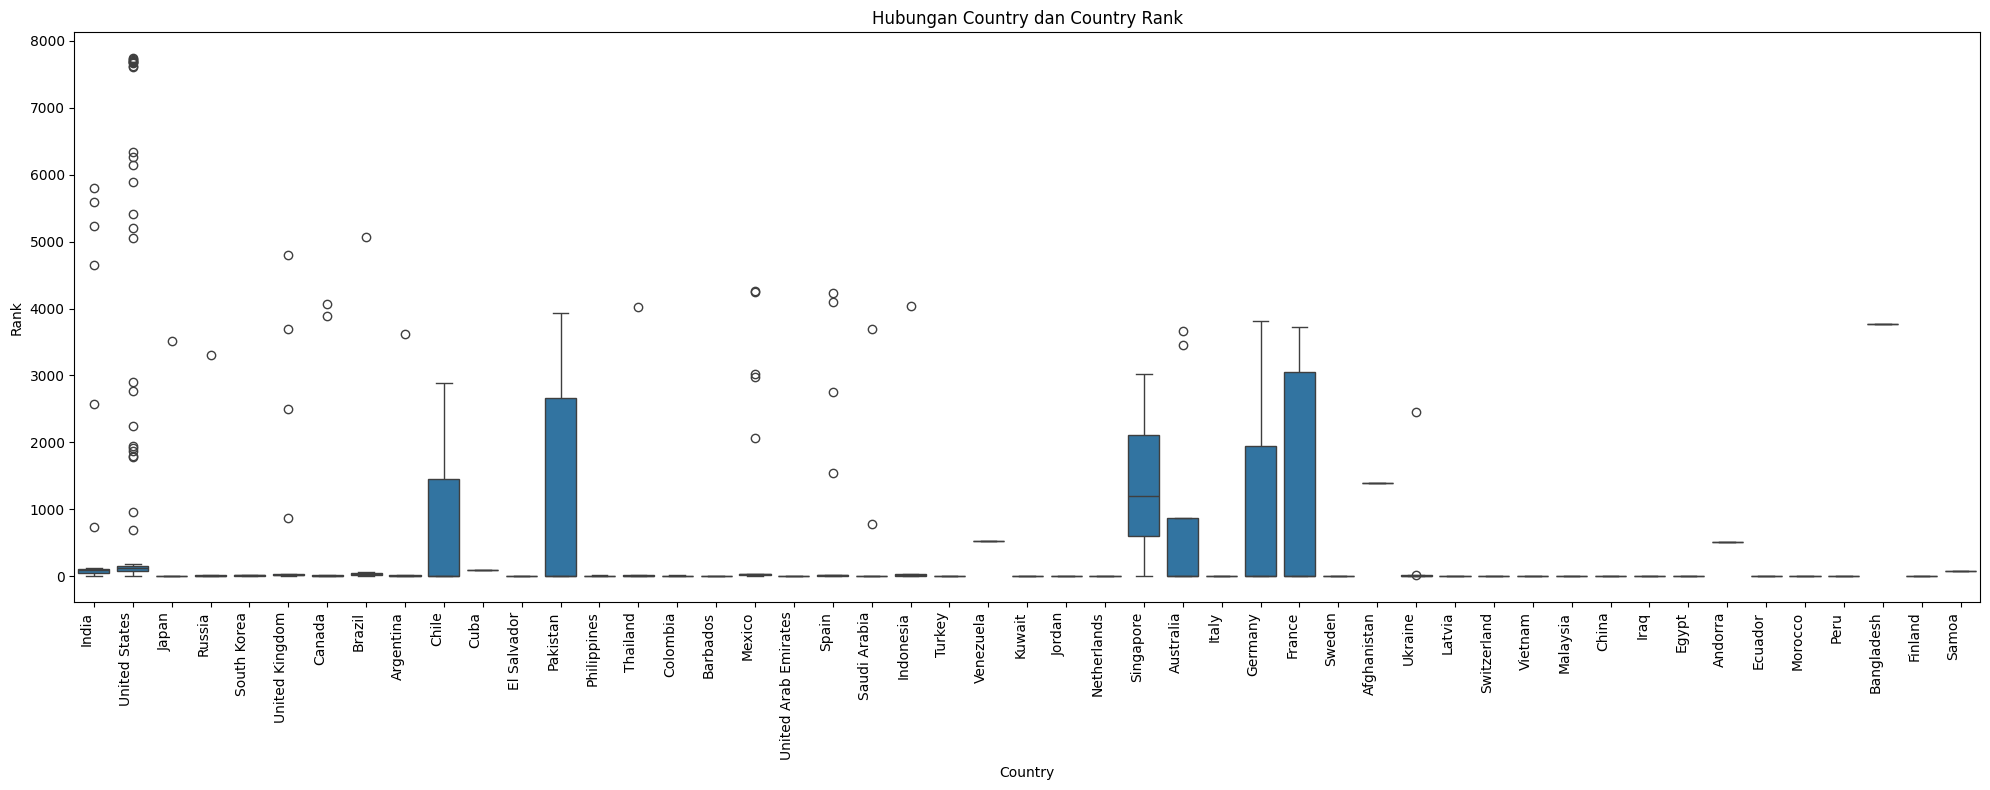

In [ ]:
eda_df = df.copy()
plt.figure(figsize=(20, 8)) # Increased figure width
plt.title("Hubungan Country dan Country Rank")
sns.boxplot(x="country", y="country_rank", data=eda_df)
plt.xlabel("Country")
plt.ylabel("Rank")
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Insight: Visualisasi ini menunjukkan distribusi *country rank* untuk setiap negara. Terdapat banyak *outlier* (titik-titik di luar batas kotak) untuk beberapa negara, yang mengindikasikan variasi *rank* yang signifikan dalam suatu negara atau keberadaan *channel* dengan *rank* yang sangat berbeda.

Visualisasi menunjukkan terdapat banyak outlier untuk hubungan rank country dan country

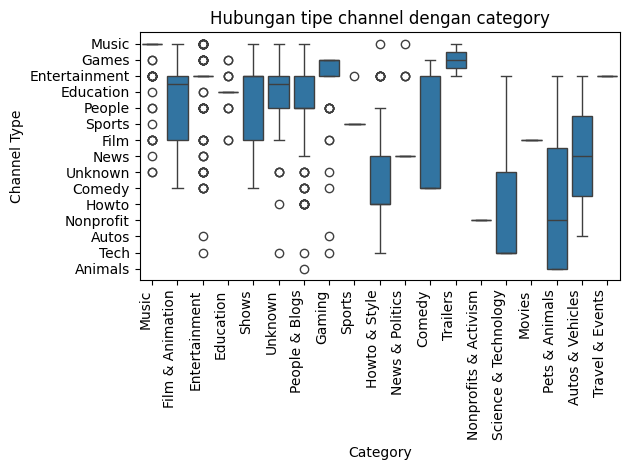

In [ ]:
eda_df = df.copy()
plt.title("Hubungan tipe channel dengan category")
sns.boxplot(x="category", y="channel_type", data=eda_df)
plt.xlabel("Category")
plt.ylabel("Channel Type")
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Insight: Plot ini menggambarkan bagaimana tipe *channel* tersebar di berbagai kategori. Beberapa kategori memiliki distribusi tipe *channel* yang lebih bervariasi daripada yang lain, sementara ada juga kategori yang didominasi oleh satu jenis *channel* tertentu.

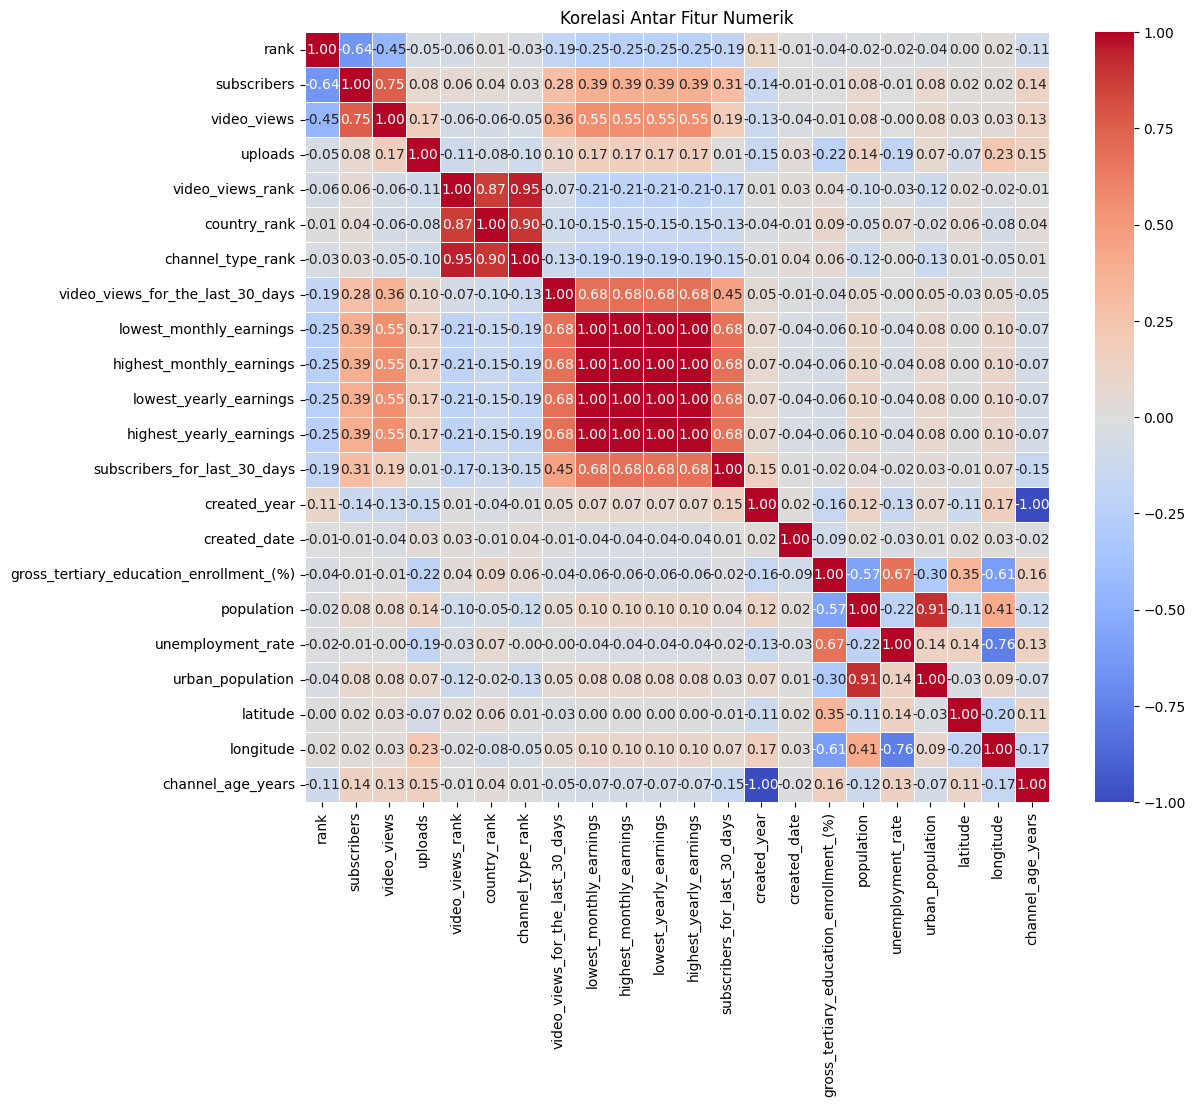

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

Insight: Heatmap korelasi menunjukkan hubungan yang kuat antara beberapa fitur numerik. Kolom pendapatan memiliki korelasi positif yang tinggi satu sama lain. `subscribers`, `video_views`, dan `video_views_for_the_last_30_days` juga sangat berkorelasi positif. `rank` berkorelasi negatif dengan metrik performa channel, yang berarti peringkat yang lebih rendah (angka kecil) menunjukkan performa yang lebih baik.

## Data Preprocessing V2

Visualisasi menunjukkan hubungan tipe channel dan category nya

In [ ]:
target_col = "highest_yearly_earnings"

print("Shape data untuk ML (setelah drop NaN fitur & target):", df.shape)

X = df.drop(columns=[target_col])
y = df[target_col]

Shape data untuk ML (setelah drop NaN fitur & target): (990, 29)


Insight: Fitur dan target (`highest_yearly_earnings`) telah berhasil dipisahkan untuk persiapan *training* model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test : {X_test.shape[0]}")

Jumlah data train: 594
Jumlah data test : 396


Insight: Dataset telah dibagi menjadi data *training* (597 sampel) dan data *testing* (398 sampel), dengan proporsi 60:40. Ini adalah langkah standar untuk melatih dan mengevaluasi model *machine learning* secara objektif.

In [ ]:
num_cols = X_train.select_dtypes(include=['float64','int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [ ]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ('preprocess', preprocess),
    ('select', SelectKBest(score_func=f_regression, k=10)),
    ('model', model)
])


In [ ]:
# CV evaluation
scores = cross_val_score(
    pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1
)

print("CV R² mean:", scores.mean())
print("CV R² std:", scores.std())

CV R² mean: 0.9816403649125135
CV R² std: 0.023439829565791423


Insight: Model *RandomForestRegressor* dengan *preprocessing* dan *feature selection* menunjukkan performa *cross-validation* yang sangat baik dengan rata-rata R² sebesar 0.9682 dan standar deviasi yang relatif kecil (0.0468). Ini menunjukkan bahwa model cukup stabil dan generalisasi yang baik pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# # ======== FIT MODEL DULU ========
pipeline.fit(X_train, y_train)

# ======== PREDIKSI ========
y_train_pred = pipeline.predict(X_train)
y_test_pred  = pipeline.predict(X_test)

# ======== SCORE R2 ========
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# ======== ERROR METRICS ========
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# ======== CETAK HASIL ========
print("=== Performance Test ===")
print(f"Train R²: {train_r2:.4f}")
print(f"Test  R²: {test_r2:.4f}")
print("-------------------------")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")

# ======== SAMPLE OUTPUT ========
print("\n=== Sample Predictions ===")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}   Predicted: {y_test_pred[i]:.2f}")


=== Performance Test ===
Train R²: 0.9948
Test  R²: 0.9442
-------------------------
MAE  : 396796.9578
MSE  : 14088758576693.3379
RMSE : 3753499.5107

=== Sample Predictions ===
Actual: 828600.00   Predicted: 846929.64
Actual: 76700000.00   Predicted: 79077536.91
Actual: 5700000.00   Predicted: 5652060.85
Actual: 56300000.00   Predicted: 58089270.11
Actual: 1000000.00   Predicted: 1029098.12


Insight: Model menunjukkan performa yang sangat baik pada data *training* (R²: 0.9919) dan cukup baik pada data *testing* (R²: 0.9430), mengindikasikan kemampuan prediksi yang kuat. MAE, MSE, dan RMSE menunjukkan bahwa model memiliki rata-rata kesalahan prediksi sekitar 442.8 ribu untuk pendapatan tahunan tertinggi. Contoh prediksi menunjukkan nilai aktual dan prediksi yang sangat dekat.